In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

Calculad las métricas para vuestro modelo

Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [2]:
df_esta = pd.read_csv("./Datos/df_esta.csv", index_col = 0)
df_esta.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,0,1
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563,0,1
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563,0,1
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563,0,1
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563,0,1


In [3]:
# separamos los datos en X e y

X1 = df_esta.drop("Weather_Mainly Clear", axis = 1)
y1 = df_esta["Weather_Mainly Clear"]

In [4]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X1.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mostly Cloudy
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,1
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563,1
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563,1
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563,1
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563,1


In [5]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Weather_Mainly Clear, dtype: int64

In [6]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [7]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

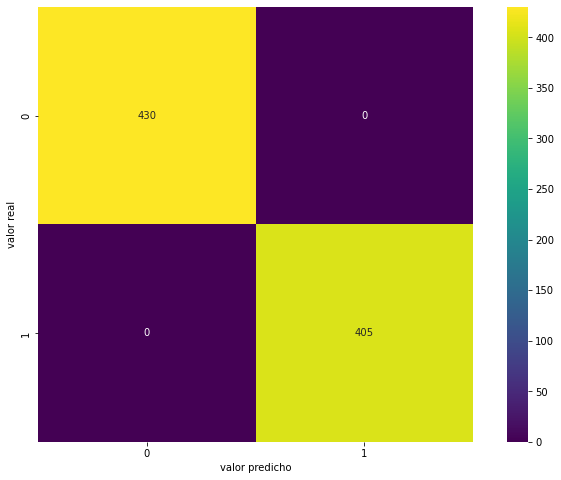

In [8]:
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [9]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [10]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,1.0,1.0,1.0,1.0,1.0,test,Regresión logistica Esta
1,1.0,1.0,1.0,1.0,1.0,train,Regresión logistica Esta


In [11]:
df = pd.read_csv("./Datos/df_esta.csv", index_col = 0)
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,0,1
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563,0,1
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563,0,1
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563,0,1
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563,0,1


In [12]:
# separamos los datos en X e y

X2 = df.drop("Weather_Mainly Clear", axis = 1)
y2 = df["Weather_Mainly Clear"]

In [13]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X2.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mostly Cloudy
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,1
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563,1
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563,1
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563,1
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563,1


In [14]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y2.head()

0    0
1    0
2    0
3    0
4    0
Name: Weather_Mainly Clear, dtype: int64

In [15]:
# separamos en train y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [16]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

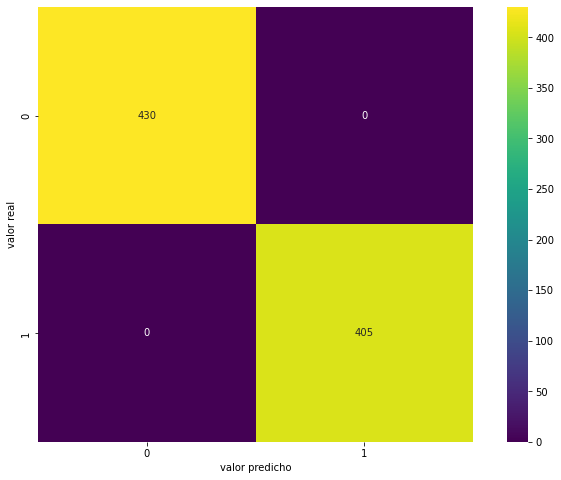

In [17]:
mat_lr = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [18]:
results_logistic = metricas(y_test2, y_pred_test, y_train2, y_pred_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,1.0,1.0,1.0,1.0,1.0,test,Regresión logistica
1,1.0,1.0,1.0,1.0,1.0,train,Regresión logistica


In [19]:
resultados_todo = pd.concat([results_logistic, results_logistic_esta], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,1.0,1.0,1.0,1.0,1.0,test,Regresión logistica
1,1.0,1.0,1.0,1.0,1.0,train,Regresión logistica
0,1.0,1.0,1.0,1.0,1.0,test,Regresión logistica Esta
1,1.0,1.0,1.0,1.0,1.0,train,Regresión logistica Esta


In [20]:
# guardemos este dataframe con los resultados en un csv para compararlo con otros modelos como hicimos en regresión lineal

resultados_todo.to_csv("./Datos/resultados_tiempo_logistica.csv")